In [1]:
from __future__ import print_function
import spacy
from spacy.matcher import PhraseMatcher
from spacy.matcher import Matcher
import PyPDF2
import re
import pandas as pd
from io import StringIO
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


nlp = spacy.load('en_core_web_sm')
phrasematcher = PhraseMatcher(nlp.vocab)
matcher = Matcher(nlp.vocab)


myfile = open('TopicTestdoc.pdf', mode = 'rb')
pdf_text = []
pdf_reader = PyPDF2.PdfFileReader(myfile)
for p in range(pdf_reader.numPages):
    page = pdf_reader.getPage(p)
    pdf_text.append(page.extractText())
myfile.close()

list1 = pdf_text
str1 = ''.join(list1)
doc = nlp(str1)


matched_sents = []

def P_sents(phrasematcher, doc, i, pmatches, label = 'MATCH'):
    match_id, start, end = pmatches[i]
    span = doc[start : end]
    sent = span.sent

    if doc.vocab.strings[match_id] == 'computation':
        match_ents = 'computation'
        #matched_sents.append(sent.text)
        matched_sents.append({'Pattern' : match_ents, 'Requirements' : sent.text})
    elif doc.vocab.strings[match_id] == 'data_defination':
        match_ents = 'data_defination'
        #matched_sents.append(sent.text)
        matched_sents.append({'Pattern' : match_ents, 'Requirements' : sent.text})
    elif doc.vocab.strings[match_id] == 'process':
        match_ents = 'process'
        #matched_sents.append(sent.text)
        matched_sents.append({'Pattern' : match_ents, 'Requirements' : sent.text})
    elif doc.vocab.strings[match_id] == 'constraint':
        match_ents = 'constraint'
        #matched_sents.append(sent.text)
        matched_sents.append({'Pattern' : match_ents, 'Requirements' : sent.text})
    elif doc.vocab.strings[match_id] == 'assumption':
        match_ents = 'assumption'
        #matched_sents.append(sent.text)
        matched_sents.append({'Pattern' : match_ents, 'Requirements' : sent.text})
    elif doc.vocab.strings[match_id] == 'model':
        match_ents = 'model'
        #matched_sents.append(sent.text)
        matched_sents.append({'Pattern' : match_ents, 'Requirements' : sent.text})
    elif doc.vocab.strings[match_id] == 'performance':
        match_ents = 'performance'
        #matched_sents.append(sent.text)
        matched_sents.append({'Pattern' : match_ents, 'Requirements' : sent.text})
    elif doc.vocab.strings[match_id] == 'hardware':
        match_ents = 'hardware'
        #matched_sents.append(sent.text)
        matched_sents.append({'Pattern' : match_ents, 'Requirements' : sent.text})


def m_sents(matcher, doc, i, matches, label = 'MATCH'):
    match_id, start, end = matches[i]
    span = doc[start : end]
    sent = span.sent

    if doc.vocab.strings[match_id] == 'Pattern1':
        match_ents = 'Pattern1'
        #matched_sents.append(sent.text)
        matched_sents.append({'Pattern' : match_ents, 'Requirements' : sent.text})
    elif doc.vocab.strings[match_id] == 'Pattern2':
        match_ents = 'Pattern2'
        #matched_sents.append(sent.text)
        matched_sents.append({'Pattern' : match_ents, 'Requirements' : sent.text})
    elif doc.vocab.strings[match_id] == 'Pattern3':
        match_ents ='Pattern3'
        #matched_sents.append(sent.text)
        matched_sents.append({'Pattern' : match_ents, 'Requirements' : sent.text})
    elif doc.vocab.strings[match_id] == 'Pattern4':
        match_ents ='Pattern4'
        #matched_sents.append(sent.text)
        matched_sents.append({'Pattern' : match_ents, 'Requirements' : sent.text})
        

computation = ['method', 'technique', 'approach', 'algorithm']
data_defination = ['data','information','file','format']
process = ['calculate','compute','discretize', 'input', 'output']
constraint = ['constraint','restriction', 'restraint', 'limitation']
assumption = ['assume','assumption', 'hypothesis']
model = ['model','framework']
performance = ['efficient','speed', 'robust']
hardware = ['CPU','memory']

phrasematcher.add('computation', P_sents, *[nlp(text) for text in computation])
phrasematcher.add('datadefination', P_sents, *[nlp(text) for text in data_defination])
phrasematcher.add('process', P_sents, *[nlp(text) for text in process])
phrasematcher.add('constraint', P_sents, *[nlp(text) for text in constraint])
phrasematcher.add('assumption', P_sents, *[nlp(text) for text in assumption])
phrasematcher.add('model', P_sents, *[nlp(text) for text in model])
phrasematcher.add('performance', P_sents, *[nlp(text) for text in performance])
phrasematcher.add('hardware', P_sents, *[nlp(text) for text in hardware])

pattern1 = [{'POS' : 'PROPN', 'TAG' : 'NNP'}, {'POS': 'VERB', 'TAG' : 'MD'}]
pattern2 = [{'POS': 'NOUN'}, {'POS': 'VERB', 'TAG' : 'MD'}]
pattern3 = [{'POS': 'NOUN'}, {'POS': 'VERB', 'TAG' : 'VBZ'}]
pattern4 = [{'POS' : 'NOUN', 'TAG' : 'NNS'}, {'POS': 'VERB', 'TAG' : 'MD'}]

matcher.add('Pattern1', m_sents, pattern1)  
matcher.add('Pattern2', m_sents, pattern2)
matcher.add('Pattern3', m_sents, pattern3)
matcher.add('Pattern4', m_sents, pattern4)

pmatches = phrasematcher(doc)
matches = matcher(doc)
#print(type(matched_sents))
#npr = pd.DataFrame(matched_sents)
#print(npr)

#for num, sentence in enumerate(matched_sents):
    #sentence = " ".join(sentence.split())    
    #print(f'{num}: {sentence}')        
 
df = pd.DataFrame(matched_sents)
df

,Pattern,Requirements
0,model,(51)\n \nTo facilitate the applicati\non of th...
1,model,"Moreover, it is appropriate to specif\ny certa..."
2,model,"Notified bodies shall, \nduring the evaluation..."
3,model,The \ncandidate has to declare that the vehicl...
4,performance,The \nunit shall provide adjustable rotation s...
5,process,The thermovision camera \nshall have an analog...
6,process,The daylight \ncamera shall have the signal to...
7,process,The daylight camera shall have an analog\n \nv...
8,performance,The console manipulators shall provide fluent ...
9,model,The digital terrain model shall consist of fol...


In [2]:
for row in df.loc[:,"Requirements"]:
    df = df.replace('\n','',regex=True)

df.drop_duplicates(subset = "Requirements", keep = 'first', inplace = True)
df

,Pattern,Requirements
0,model,(51) To facilitate the application of this Reg...
1,model,"Moreover, it is appropriate to specify certain..."
2,model,"Notified bodies shall, during the evaluation o..."
3,model,The candidate has to declare that the vehicles...
4,performance,The unit shall provide adjustable rotation spe...
5,process,The thermovision camera shall have an analog v...
6,process,The daylight camera shall have the signal to n...
7,process,The daylight camera shall have an analog video...
8,performance,The console manipulators shall provide fluent ...
9,model,The digital terrain model shall consist of fol...


In [3]:
df1 = df.reset_index()
df1
#df.to_csv('coherence1.csv')
#df.head()

,index,Pattern,Requirements
0,0,model,(51) To facilitate the application of this Reg...
1,1,model,"Moreover, it is appropriate to specify certain..."
2,2,model,"Notified bodies shall, during the evaluation o..."
3,3,model,The candidate has to declare that the vehicles...
4,4,performance,The unit shall provide adjustable rotation spe...
5,5,process,The thermovision camera shall have an analog v...
6,6,process,The daylight camera shall have the signal to n...
7,7,process,The daylight camera shall have an analog video...
8,8,performance,The console manipulators shall provide fluent ...
9,9,model,The digital terrain model shall consist of fol...


In [4]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim import models
import nltk; nltk.download('stopwords')
import numpy as np
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from','subject','re','edu','use'])

#spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
#print('Number of stop words: %d' % len(spacy_stopwords))

#customize_stop_words = ['facilitate', 'filtered']
#for w in customize_stop_words:
#nlp.vocab[w].is_stop = True
#print('First ten stop words: %s' % list(spacy_stopwords)[:30])

In [32]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [33]:
data = df.Requirements.values.tolist()
pprint(data[:1])

['(51) To facilitate the application of this Regulation, Member States should, '
 'with a view to making the information available to the public through any '
 'appropriate means and, in particular, through the European e-Justice Portal, '
 'provide the Commission via IMI with the contact details of their central '
 'authorities, the models of the most commonly used public documents under '
 'their national law or, where no such model exists for a document, '
 "information about that document's specific features. "]


In [34]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data_words = list(sent_to_words(data))
print(data_words[:1])

[['to', 'facilitate', 'the', 'application', 'of', 'this', 'regulation', 'member', 'states', 'should', 'with', 'view', 'to', 'making', 'the', 'information', 'available', 'to', 'the', 'public', 'through', 'any', 'appropriate', 'means', 'and', 'in', 'particular', 'through', 'the', 'european', 'justice', 'portal', 'provide', 'the', 'commission', 'via', 'imi', 'with', 'the', 'contact', 'details', 'of', 'their', 'central', 'authorities', 'the', 'models', 'of', 'the', 'most', 'commonly', 'used', 'public', 'documents', 'under', 'their', 'national', 'law', 'or', 'where', 'no', 'such', 'model', 'exists', 'for', 'document', 'information', 'about', 'that', 'document', 'specific', 'features']]


In [35]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold = 100)
trigram = gensim.models.Phrases(bigram[data_words], threshold = 100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

print(trigram[bigram[data_words[0]]])

['to', 'facilitate', 'the', 'application', 'of', 'this', 'regulation', 'member', 'states', 'should', 'with', 'view', 'to', 'making', 'the', 'information', 'available', 'to', 'the', 'public', 'through', 'any', 'appropriate', 'means', 'and', 'in', 'particular', 'through', 'the', 'european', 'justice', 'portal', 'provide', 'the', 'commission', 'via', 'imi', 'with', 'the', 'contact', 'details', 'of', 'their', 'central', 'authorities', 'the', 'models', 'of', 'the', 'most', 'commonly', 'used', 'public', 'documents', 'under', 'their', 'national', 'law', 'or', 'where', 'no', 'such', 'model', 'exists', 'for', 'document', 'information', 'about', 'that', 'document', 'specific', 'features']


In [36]:
#Testing spaCy stopwords
#def remove_stopwords_spacy(texts):
#doc = nlp(str(texts))
#token = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
#print('Original Article: %s' % (texts))
#print(token)

In [37]:
#def remove_stopwords(texts):
    #doc = nlp(str(texts))
    #token = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    #return token
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return[bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ','VERB', 'ADV']):
    texts_out = []
    
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [38]:
data_words_nostops = remove_stopwords(data_words)

data_words_bigrams = make_bigrams(data_words_nostops)

nlp = spacy.load('en_core_web_sm', disable = ['parser', 'ner'])

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])


[['facilitate', 'application', 'regulation', 'member', 'state', 'view', 'make', 'information', 'available', 'public', 'appropriate', 'mean', 'particular', 'european', 'justice', 'portal', 'provide', 'commission', 'contact', 'detail', 'central', 'authority', 'model', 'commonly', 'use', 'public', 'document', 'national', 'law', 'model', 'exist', 'document', 'information', 'document', 'specific', 'feature']]


In [39]:
id2word = corpora.Dictionary(data_lemmatized)

texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 3), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)]]


In [40]:
id2word[79]

'speed'

In [41]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('application', 1),
  ('appropriate', 1),
  ('authority', 1),
  ('available', 1),
  ('central', 1),
  ('commission', 1),
  ('commonly', 1),
  ('contact', 1),
  ('detail', 1),
  ('document', 3),
  ('european', 1),
  ('exist', 1),
  ('facilitate', 1),
  ('feature', 1),
  ('information', 2),
  ('justice', 1),
  ('law', 1),
  ('make', 1),
  ('mean', 1),
  ('member', 1),
  ('model', 2),
  ('national', 1),
  ('particular', 1),
  ('portal', 1),
  ('provide', 1),
  ('public', 2),
  ('regulation', 1),
  ('specific', 1),
  ('state', 1),
  ('use', 1),
  ('view', 1)]]

In [42]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [43]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.244*"system" + 0.103*"shall" + 0.067*"monitor" + 0.050*"agree" + '
  '0.048*"time" + 0.038*"image" + 0.020*"record" + 0.016*"interface" + '
  '0.015*"limit" + 0.013*"video"'),
 (1,
  '0.030*"representative" + 0.025*"communicate" + 0.019*"publicly" + '
  '0.018*"fast" + 0.015*"information" + 0.015*"allow" + 0.015*"detection" + '
  '0.015*"overcome" + 0.007*"serve" + 0.007*"anonymised"'),
 (2,
  '0.074*"scope" + 0.061*"type" + 0.058*"condition" + 0.036*"follow" + '
  '0.029*"make" + 0.026*"person" + 0.023*"list" + 0.022*"least" + '
  '0.018*"paragraph" + 0.018*"record"'),
 (3,
  '0.088*"delivery" + 0.085*"union" + 0.075*"country" + 0.043*"set" + '
  '0.037*"internal" + 0.032*"free" + 0.027*"level" + 0.026*"european" + '
  '0.016*"movement" + 0.016*"digital"'),
 (4,
  '0.085*"copy" + 0.034*"formality" + 0.023*"similar" + 0.022*"legalisation" + '
  '0.019*"provision" + 0.012*"council" + 0.012*"reply" + 0.012*"request" + '
  '0.012*"simplification" + 0.012*"oblige"'),
 (5,
  '0.05

In [44]:
#Compute Model Perplexity and Coherence Score

#compute perplexity
print('\n perplexity: ', lda_model.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print('\n Coherence Score: ', coherence_lda)


 perplexity:  -12.200162241823854

 Coherence Score:  0.4002810434065854


In [45]:
#Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.
 [_prepare.py:257]


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
19    -0.401133  0.022928       1        1  20.238266
7     -0.013666 -0.353580       2        1  15.210290
12    -0.029727 -0.120535       3        1   9.831604
9     -0.048961  0.069317       4        1   6.852305
15     0.039506  0.032259       5        1   5.355641
13     0.034613  0.039801       6        1   5.318231
10     0.030782 -0.039700       7        1   5.114514
0     -0.176804  0.059390       8        1   5.026381
3      0.043775  0.043478       9        1   4.526204
8      0.051774 -0.073875      10        1   3.879709
2      0.046368 -0.000880      11        1   3.621170
14     0.032894  0.029883      12        1   2.817458
16     0.054379  0.031153      13        1   2.516336
11     0.052425  0.039058      14        1   2.265614
6      0.041426  0.036310      15        1   2.037426
17     0.049657  0.040310      16        1   1.418941
4      0.050566  0.037814      17        1   1.220726
1      0.044873  0.031588      18        1   1.116156
5      0.049762  0.032385      19        1   0.840369
18     0.047491  0.042895      20        1   0.792659, topic_info=     Category        Freq                 Term       Total  loglift  logprob
term                                                                        
56    Default  446.000000                shall  446.000000  30.0000  30.0000
76    Default   65.000000              vehicle   65.000000  29.0000  29.0000
170   Default   79.000000               system   79.000000  28.0000  28.0000
24    Default   99.000000              provide   99.000000  27.0000  27.0000
9     Default   74.000000             document   74.000000  26.0000  26.0000
25    Default   64.000000               public   64.000000  25.0000  25.0000
28    Default   76.000000                state   76.000000  24.0000  24.0000
19    Default   76.000000               member   76.000000  23.0000  23.0000
369   Default   32.000000                  day   32.000000  22.0000  22.0000
516   Default   33.000000                 must   33.000000  21.0000  21.0000
217   Default   23.000000              include   23.000000  20.0000  20.0000
29    Default   23.000000                  use   23.000000  19.0000  19.0000
294   Default   20.000000             language   20.000000  18.0000  18.0000
161   Default   28.000000          requirement   28.000000  17.0000  17.0000
105   Default   28.000000           contractor   28.000000  16.0000  16.0000
2     Default   51.000000            authority   51.000000  15.0000  15.0000
256   Default   32.000000                  may   32.000000  14.0000  14.0000
52    Default   30.000000                issue   30.000000  13.0000  13.0000
196   Default   26.000000              require   26.000000  12.0000  12.0000
106   Default   18.000000             delivery   18.000000  11.0000  11.0000
331   Default   17.000000                allow   17.000000  10.0000  10.0000
87    Default   26.000000  thermovision_camera   26.000000   9.0000   9.0000
249   Default   18.000000                 form   18.000000   8.0000   8.0000
152   Default   17.000000                union   17.000000   7.0000   7.0000
26    Default   45.000000           regulation   45.000000   6.0000   6.0000
358   Default   11.000000         verification   11.000000   5.0000   5.0000
49    Default   15.000000          certificate   15.000000   4.0000   4.0000
71    Default   11.000000                offer   11.000000   3.0000   3.0000
132   Default   19.000000                 user   19.000000   2.0000   2.0000
63    Default   15.000000              country   15.000000   1.0000   1.0000
...       ...         ...                  ...         ...      ...      ...
1041  Topic20    0.023142              drawing    1.075408   0.9987  -7.2931
710   Topic20    0.023149              control    1.075775   0.9987  -7.2928
906   Topic20    0.023142               screen    1.075454   0.9987  -7.29

In [46]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
import os
from gensim.models.wrappers import LdaMallet
os.environ.update({'MALLET_HOME':r'C:\\Users\\Rohan\\Desktop\\python\\masterthesis\\gensim\\mallet-2.0.8'})
mallet_path = 'C:\\Users\\Rohan\\Desktop\\python\\masterthesis\\gensim\\mallet-2.0.8\\bin\\mallet'
#mallet_path = 'mallet-2.0.8' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [47]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(18,
  [('state', 0.34099616858237547),
   ('member', 0.34099616858237547),
   ('issue', 0.1111111111111111),
   ('application', 0.019157088122605363),
   ('cover', 0.019157088122605363),
   ('citizen', 0.01532567049808429),
   ('residence', 0.01532567049808429),
   ('conclude', 0.011494252873563218),
   ('situation', 0.007662835249042145),
   ('autonomous', 0.007662835249042145)]),
 (7,
  [('monitor', 0.08045977011494253),
   ('unit', 0.07471264367816093),
   ('image', 0.05172413793103448),
   ('compartment', 0.04597701149425287),
   ('radio', 0.04597701149425287),
   ('display', 0.04597701149425287),
   ('include', 0.04597701149425287),
   ('technical', 0.040229885057471264),
   ('separate', 0.040229885057471264),
   ('require', 0.034482758620689655)]),
 (10,
  [('authority', 0.30434782608695654),
   ('request', 0.11413043478260869),
   ('certified_copy', 0.05434782608695652),
   ('receive', 0.03260869565217391),
   ('administrative', 0.03260869565217391),
   ('central', 0.032608695

In [48]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        #model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [70]:

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=4, limit=20, step=4)

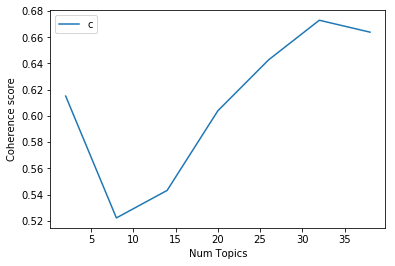

In [123]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [71]:
# Print the coherence scores
limit=20; start=4; step=4;
x = range(start, limit, step)
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 4  has Coherence Value of 0.5802
Num Topics = 8  has Coherence Value of 0.5614
Num Topics = 12  has Coherence Value of 0.5299
Num Topics = 16  has Coherence Value of 0.5972


In [72]:
# Select the model and print the topics
optimal_model = model_list[0]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.067*"provide" + 0.065*"system" + 0.051*"vehicle" + 0.021*"radio_terminal" '
  '+ 0.018*"set" + 0.017*"unit" + 0.017*"control" + 0.016*"operator" + '
  '0.014*"drive" + 0.013*"minimum"'),
 (1,
  '0.077*"member" + 0.077*"state" + 0.076*"document" + 0.065*"public" + '
  '0.048*"authority" + 0.047*"regulation" + 0.027*"information" + '
  '0.026*"issue" + 0.022*"form" + 0.019*"person"'),
 (2,
  '0.027*"include" + 0.025*"request" + 0.022*"thermovision_camera" + '
  '0.019*"cover" + 0.019*"electronic" + 0.018*"time" + 0.017*"monitor" + '
  '0.015*"registered_partnership" + 0.014*"legal" + 0.013*"range"'),
 (3,
  '0.029*"union" + 0.017*"daylight_camera" + 0.016*"body" + 0.015*"training" + '
  '0.014*"equipment" + 0.014*"day" + 0.014*"medical_device" + '
  '0.014*"requirement" + 0.013*"notify" + 0.013*"risk"')]


In [73]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                #sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), topic_keywords]), ignore_index=True)
            else:
                break
    #sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    sent_topics_df.columns = ['Dominant_Topic', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    #return(sent_topics_df)
     
    sent_topics_df['Pattern'] = pd.Series(df1['Pattern'])
    return(sent_topics_df)
    
    #patterns = df.series(Pattern)
    #sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    #return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
#df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.columns = ['Index','Topic', 'Keywords', 'Text', 'Pattern']
# Show
#df_dominant_topic.set_index('Index', drop=True, append=False, inplace=False, verify_integrity=False)
df_dominant_topic
#print(type(df_dominant_topic))
#<class 'pandas.core.frame.DataFrame'>


,Index,Topic,Keywords,Text,Pattern
0,0,1.0,"member, state, document, public, authority, re...",(51) To facilitate the application of this Reg...,model
1,1,3.0,"union, daylight_camera, body, training, equipm...","Moreover, it is appropriate to specify certain...",model
2,2,3.0,"union, daylight_camera, body, training, equipm...","Notified bodies shall, during the evaluation o...",model
3,3,0.0,"provide, system, vehicle, radio_terminal, set,...",The candidate has to declare that the vehicles...,model
4,4,0.0,"provide, system, vehicle, radio_terminal, set,...",The unit shall provide adjustable rotation spe...,performance
5,5,2.0,"include, request, thermovision_camera, cover, ...",The thermovision camera shall have an analog v...,process
6,6,3.0,"union, daylight_camera, body, training, equipm...",The daylight camera shall have the signal to n...,process
7,7,2.0,"include, request, thermovision_camera, cover, ...",The daylight camera shall have an analog video...,process
8,8,2.0,"include, request, thermovision_camera, cover, ...",The console manipulators shall provide fluent ...,performance
9,9,2.0,"include, request, thermovision_camera, cover, ...",The digital terrain model shall consist of fol...,model


In [128]:
keywords = 'daylight' and 'adjustable'
df = df_dominant_topic[df_dominant_topic['Text'].str.contains(re.compile(keywords))]
df

,Index,Topic,Keywords,Text,Pattern
4,4,3.0,"set, regard, daylight_camera, medical_device, ...",The unit shall provide adjustable rotation spe...,performance
118,118,6.0,"include, person, thermovision_camera, national...",3.2.8 Steering column shall have height and le...,Pattern2
152,152,7.0,"vehicle, body, notify, paragraph, model, minim...",3.7.11 The vehicle shall be equipped with elec...,Pattern2


In [74]:
df_dominant_topic.to_csv('4topics_gensim.csv')